<a href="https://colab.research.google.com/github/krystianpoczewski/SIOC--zajecia/blob/main/Image_Scaling_SIOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.transform import resize

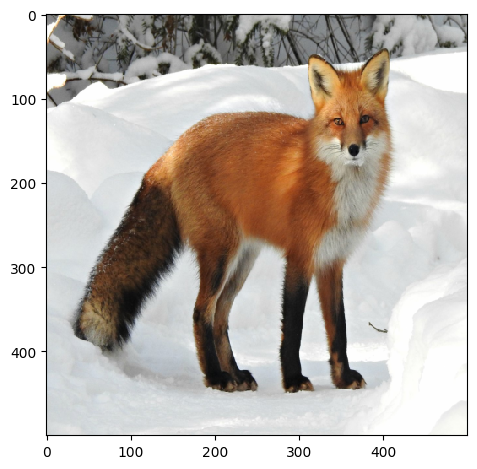

In [ ]:
img = io.imread('photo.jpg')
img = resize(img, (500, 500))
io.imshow(img)

In [ ]:
def kernel(step):
  return (np.ones([step, step]) / (step**2))

In [ ]:
def downsize_avaraging_kernel(img, k, step = 1, padding = 0):
  result = np.zeros([img.shape[0] // step, img.shape[1] // 2, img.shape[2]])

  for x in range(0, img.shape[0], step):
    for y in range(0, img.shape[1], step):
      for c in range(0, img.shape[2]):
        pix = (img[x : x + step, y : y + step, c] * k).sum()
        result[x // step, y // step, c] = pix

  return result


In [ ]:
def downsize_max_pooling(img, step = 1, padding = 0):
  result = np.zeros([img.shape[0] // step, img.shape[1] // 2, img.shape[2]])

  for x in range(0, img.shape[0], step):
    for y in range(0, img.shape[1], step):
      for c in range(0, img.shape[2]):
        pix = np.max(img[x : x + step, y : y + step, c])
        result[x // step, y // step, c] = pix

  return result


In [ ]:
step = 2

In [ ]:
k = kernel(step)

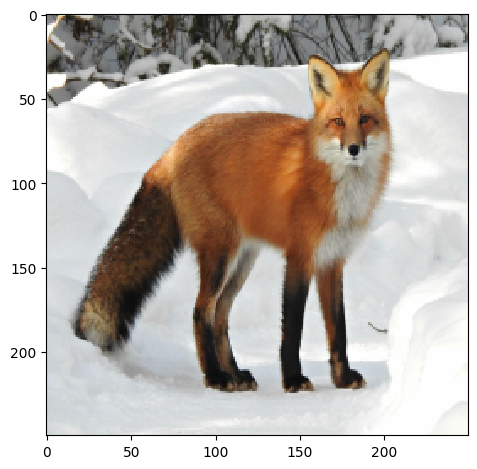

In [ ]:
downsized = downsize_avaraging_kernel(img, k = k, step = step)
io.imshow(downsized)

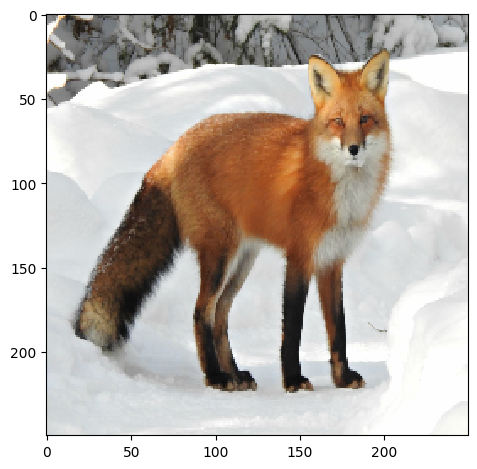

In [ ]:
downsized = downsize_max_pooling(img, step = step)
io.imshow(downsized)

In [ ]:
def conv1d_interpolate(x_measure, y_measure, x_interpolate, kernel):
    """
    Interpolate using a convolution kernel

    :param x_measure: x values of the measurements
    :param y_measure: y values of the measurements
    :param x_interpolate: x values of the interpolation
    :param kernel: callable interpolation kernel accepting x, offset and width

    :return: y values of the interpolation
    """
    width = x_measure[1] - x_measure[0]  # store period between samples
    kernels = [kernel(x_interpolate, offset=offset, width=width) for offset in x_measure]

    return y_measure @ kernels

In [ ]:
def linear_kernel(x, offset: float, width: float):
    """Linear interpolation kernel"""
    x = x - offset
    x = x / width
    return (1 - np.abs(x)) * (np.abs(x) < 1)


In [ ]:
import cv2

def upscale(img, scale, kernel, padding=0):
    result = np.zeros([scale * img.shape[0], img.shape[1], img.shape[2]])

    x = np.linspace(0, 1, len(img[0, :]))
    x_interpolate = np.linspace(0, 1, scale * len(img[0, :]))

    for row in range(img.shape[1]):
        for c in range(img.shape[2]):
            result[:, row, c] = conv1d_interpolate(x_measure=x, y_measure=img[row, :, c], x_interpolate=x_interpolate, kernel=kernel)

    final_result = np.zeros([scale * img.shape[0], scale * img.shape[1], img.shape[2]])
    x2 = x = np.linspace(0, 1, len(img[:, 0]))
    x2_interpolate = x = np.linspace(0, 1, scale * len(img[:, 0]))
    for col in range(result.shape[0]):
        for c in range(img.shape[2]):
            final_result[col, :, c] = conv1d_interpolate(x_measure=x2, y_measure=result[col, :, c], x_interpolate=x2_interpolate, kernel=kernel)

    return cv2.rotate(final_result[:, ::-1, :], cv2.ROTATE_90_COUNTERCLOCKWISE)

In [ ]:
upscaled = upscale(downsized, scale=2, kernel=linear_kernel)

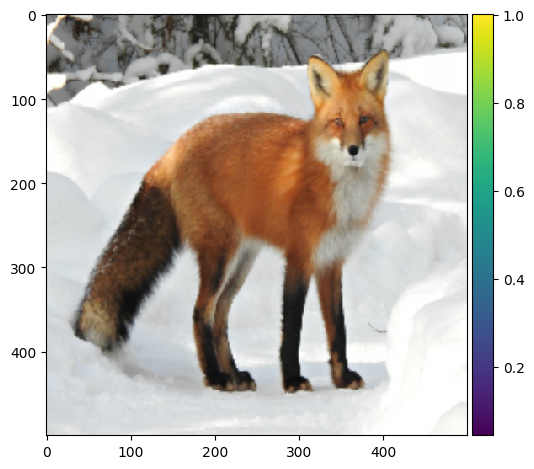

In [ ]:
io.imshow(upscaled)

In [ ]:
from sklearn.metrics import mean_squared_error
for c in range(0, img.shape[2]):
  print(f"{mean_squared_error(upscaled[:,:,c], img[:,:,c])}")

0.0014687371339642537
0.0014970480231517027
0.0015900643124308552
